# Group 2 EDA

### By Parker Christenson

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import linear_model

In [2]:
# Reading in the data from the csv file
df = pd.read_csv('Occupancy.csv')
df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
1,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
2,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
3,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
4,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [3]:
# Getting the range of the date column 
min_date = df['date'].min()
max_date = df['date'].max()

# getting the amounts of blanks in each of the rows of the data frame by column 
null_data = df.isnull().sum()

print(f"The max date is {max_date} and the min date is {min_date} for the data set")
print(f"The amount of null data in each column is: \n{null_data}")

The max date is 2015-02-18 09:19:00 and the min date is 2015-02-02 14:19:00 for the data set
The amount of null data in each column is: 
date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64


### Here we can see that the end date of the observation of data is 02-18-2015, and the first entry of the data is 02-02-2015. 

#### With that being said, the range of our data is only, 16 days. 

In [4]:
# Removing the time from the date column to make a time column
df['time'] = df['date'].str[11:]
df['date'] = df['date'].str[:10]
df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,time
0,2015-02-02,23.7000,26.272,585.200000,749.200000,0.004764,1,14:19:00
1,2015-02-02,23.7180,26.290,578.400000,760.400000,0.004773,1,14:19:59
2,2015-02-02,23.7300,26.230,572.666667,769.666667,0.004765,1,14:21:00
3,2015-02-02,23.7225,26.125,493.750000,774.750000,0.004744,1,14:22:00
4,2015-02-02,23.7540,26.200,488.600000,779.000000,0.004767,1,14:23:00


In [5]:
# getting the length of the data frame
length = len(df)
print(f"The length of the data frame is {length}")

# getting the count of the days in the date column 
date_count = df['date'].value_counts()

# dividing the length of the data frame by the count of the days in the date column to get the amount of rows per day
rows_per_day = length / len(date_count)
print(f"The amount of rows per day is {rows_per_day}")


The length of the data frame is 20560
The amount of rows per day is 1209.4117647058824


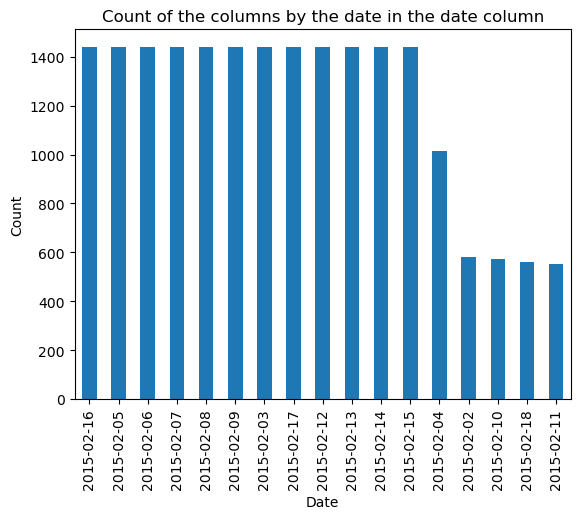

In [6]:
# getting the count of the columns by the date in the date column
date_count.plot(kind='bar')
plt.title('Count of the columns by the date in the date column')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

In [7]:
# printing the count of rows by the date in the date column
print(f"The count of rows by the date in the date column is: \n{date_count}")

The count of rows by the date in the date column is: 
date
2015-02-16    1440
2015-02-05    1440
2015-02-06    1440
2015-02-07    1440
2015-02-08    1440
2015-02-09    1440
2015-02-03    1440
2015-02-17    1440
2015-02-12    1440
2015-02-13    1440
2015-02-14    1440
2015-02-15    1440
2015-02-04    1013
2015-02-02     581
2015-02-10     574
2015-02-18     560
2015-02-11     552
Name: count, dtype: int64


### Here we see that the amount of measurements is not equal by verifying the amount of measurements per day. 

### We are now going to look into more of the details in the data set, and try to extract some kind of hints or clues, that could lead us in the right direction

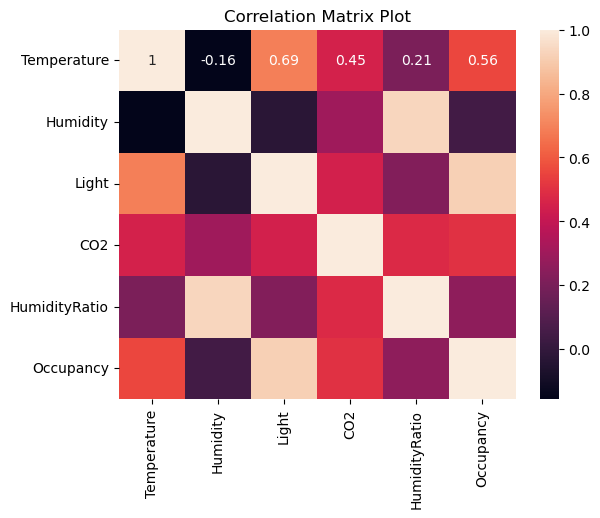

In [8]:
# Making a correlation matrix plot to see the correlation between the columns
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix Plot')
plt.show()

### So we can see that we have some strong relationships, and some weak ones. We are going to do some inital plotting, and then some feature extraction. 

In [9]:
# Recombining the date and time columns
df['datetime'] = df['date'] + ' ' + df['time']
df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,time,datetime
0,2015-02-02,23.7000,26.272,585.200000,749.200000,0.004764,1,14:19:00,2015-02-02 14:19:00
1,2015-02-02,23.7180,26.290,578.400000,760.400000,0.004773,1,14:19:59,2015-02-02 14:19:59
2,2015-02-02,23.7300,26.230,572.666667,769.666667,0.004765,1,14:21:00,2015-02-02 14:21:00
3,2015-02-02,23.7225,26.125,493.750000,774.750000,0.004744,1,14:22:00,2015-02-02 14:22:00
4,2015-02-02,23.7540,26.200,488.600000,779.000000,0.004767,1,14:23:00,2015-02-02 14:23:00


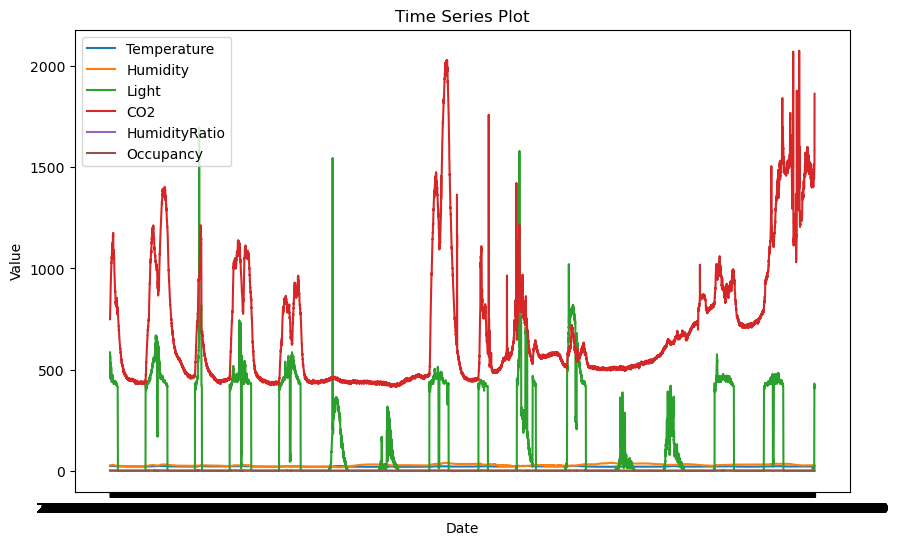

In [10]:
# Set this new column as the index
df.set_index('datetime', inplace=True)

# Drop the original 'date' and 'time' columns if they are no longer needed
df.drop(['date', 'time'], axis=1, inplace=True)

# Plotting
plt.figure(figsize=(10, 6))
for column in df.columns:
    plt.plot(df.index, df[column], label=column)

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Plot')
plt.legend()
plt.show()

### Comment after running 
# Took around 2 minutes to run the code

In [11]:
import plotly.graph_objects as go
import umap

# Selecting only the relevant columns for UMAP
relevant_data = df[['Occupancy', 'Light', 'HumidityRatio']]

# Apply UMAP
reducer = umap.UMAP(n_components=3, random_state=42)
embedding = reducer.fit_transform(relevant_data)

# Using 'occupancy' or another column for color
color = df['Occupancy']  # Replace 'occupancy' with the column you want to use for color
scatter = go.Scatter3d(
    x=embedding[:, 0],
    y=embedding[:, 1],
    z=embedding[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color=color,  
        colorscale='Viridis',  
        opacity=0.8
    )
)

fig = go.Figure(data=[scatter])

fig.update_layout(
    title='3D UMAP Visualization with Viridis Color Scheme',
    scene=dict(
        xaxis_title='UMAP Dimension 1',
        yaxis_title='UMAP Dimension 2',
        zaxis_title='UMAP Dimension 3'
    ),
    margin=dict(l=0, r=0, b=0, t=0)
)

fig.show()

c:\Users\tehwh\anaconda3\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\tehwh\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\tehwh\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:393: UserWarning: Exited at iteration 2000 with accuracies 
[9.02392747e-14 3.22916147e-07 7.11958270e-07 1.27734979e-06
 1.95693401e-05]
not reaching the requested tolerance 4.0978193283081055e-06.
Use iteration 660 instead with accuracy 
1.6992437776019777e-06.

  _, diffusion_map = lobpcg(
c:\Users\tehwh\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:393: UserWarning: Exited postprocessing with accuracies 
[4.52796592e-15 3.77

### The group really wanted to see the clustering in the model, the colors represented occupancy and we wanted to see if an easy model could be produced with the data presented. But due to the complex nature of the data set, it looks like we will have to pick a more complicated algo. 

## Feature Extraction

In [12]:
df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
datetime,,,,,,
2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [13]:
# making the datetime index back into a column
df.reset_index(inplace=True)
#df.head()

In [14]:
# Making a new column for the hour of the day
df['hour'] = df['datetime'].str[11:13]
#df.head()

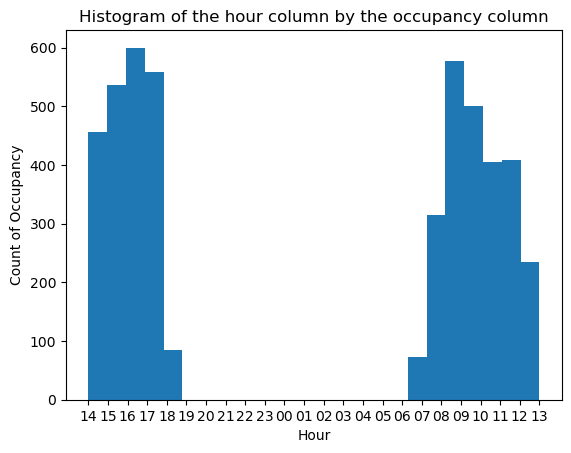

In [15]:
# making a histogram of the hour column by the occupancy column
plt.hist(df['hour'], bins=24, weights=df['Occupancy'])
plt.title('Histogram of the hour column by the occupancy column')
plt.xlabel('Hour')
plt.ylabel('Count of Occupancy')
plt.show()

In [16]:
# getting the range of hours where the occupancy is 1 and 0
df_1 = df[df['Occupancy'] == 1]
df_0 = df[df['Occupancy'] == 0]
print(f"The range of hours where there is occupancy (1) is {df_1['hour'].min()} to {df_1['hour'].max()}")
print(f"The range of hours where there is no occupancy (0) is {df_0['hour'].min()} to {df_0['hour'].max()}")

The range of hours where there is occupancy (1) is 07 to 18
The range of hours where there is no occupancy (0) is 00 to 23


### histogram by weekday

In [17]:
# getting the day of the week from the datetime column
df['datetime'] = pd.to_datetime(df['datetime'])
df['day_of_week'] = df['datetime'].dt.day_name()
df.head()

,datetime,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,hour,day_of_week
0,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1,14,Monday
1,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1,14,Monday
2,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1,14,Monday
3,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1,14,Monday
4,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1,14,Monday


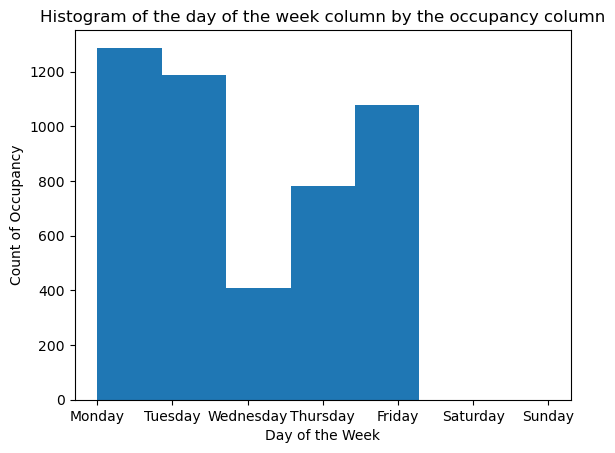

In [18]:
# making a histogram of the day of the week column by the occupancy column
plt.hist(df['day_of_week'], bins=7, weights=df['Occupancy'])
plt.title('Histogram of the day of the week column by the occupancy column')
plt.xlabel('Day of the Week')
plt.ylabel('Count of Occupancy')
plt.show()